# HEALTH CARE EXPLORATORY DATA ANALYSIS(EDA)
Healthcare is a critical domain where data plays pivotal role in understanding patient demographics,medical conditions, and the effectiveness of healthcare services. In this EDAproject, we will delve into a synthetic healthcare dataset that mimics real-world data.This dataset encompasses various aspects of patient information, admission details, medical conditions, and healthcare services, making it a comprehensive dataset for analysis.The primary goal of this project is to explore, clean, and visualize the data to gain insights into healthcare trends and understand the distribution of medical conditions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning

In [2]:
# Load the healthcare dataset from the specified file path
healthcare=pd.read_csv('healthcare_dataset.csv')
healthcare.head().T
# .T => # Transpose the DataFrame to display columns as rows for better readability

,0,1,2,3,4
Name,Bobby JacksOn,LesLie TErRy,DaNnY sMitH,andrEw waTtS,adrIENNE bEll
Age,30,62,76,28,43
Gender,Male,Male,Female,Female,Female
Blood Type,B-,A+,A-,O+,AB+
Medical Condition,Cancer,Obesity,Obesity,Diabetes,Cancer
Date of Admission,2024-01-31,2019-08-20,2022-09-22,2020-11-18,2022-09-19
Doctor,Matthew Smith,Samantha Davies,Tiffany Mitchell,Kevin Wells,Kathleen Hanna
Hospital,Sons and Miller,Kim Inc,Cook PLC,"Hernandez Rogers and Vang,",White-White
Insurance Provider,Blue Cross,Medicare,Aetna,Medicare,Aetna
Billing Amount,18856.281306,33643.327287,27955.096079,37909.78241,14238.317814


# DATASET BRIEF OVERVIEW

In [3]:
healthcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [4]:
healthcare.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


conclusion: we can conclude from the above table that age range of patients is between 13 to 85. The maximum billing amount is 52764.# The minimum¶
billing amount is ₹-2008.49, likely due to insurance adjustments, refunds, or claim reversals.

In [5]:
# Generate summary statistics for categorical columns, including unique values and most frequent categories.
healthcare.describe(include='O')

,Name,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Admission Type,Discharge Date,Medication,Test Results
count,55500,55500,55500,55500,55500,55500,55500,55500,55500,55500,55500,55500
unique,49992,2,8,6,1827,40341,39876,5,3,1856,5,3
top,DAvId muNoZ,Male,A-,Arthritis,2024-03-16,Michael Smith,LLC Smith,Cigna,Elective,2020-03-15,Lipitor,Abnormal
freq,3,27774,6969,9308,50,27,44,11249,18655,53,11140,18627


Instead of numerical statistics (like mean, std), it provides insights like:

Count → Number of non-null values.

Unique → Number of unique categories.

Top → Most frequent category.

Freq → Frequency of the most common category.

In [6]:
healthcare.shape

(55500, 15)

There are 10000 rows and 15 columns in this dataset.

In [7]:
#check for NULL values if any in each column
healthcare.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

There are no null values in our healthcare dataset as the value for all the columns are zero.

In [8]:
#check if there are duplicate records in the data
# Display all duplicate rows
healthcare[healthcare.duplicated()]


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
50023,Samuel joYCe,56,Male,O+,Arthritis,2022-11-03,Krista Hartman,Thomas-Ballard,UnitedHealthcare,15654.830587,157,Urgent,2022-11-22,Aspirin,Inconclusive
50040,KIMBErly vasqueZ,26,Male,A-,Obesity,2023-10-23,Jennifer Bennett,Cowan Inc,UnitedHealthcare,38142.109678,313,Urgent,2023-11-18,Penicillin,Abnormal
50055,SCoTT tHOrNton,55,Female,B-,Obesity,2021-04-08,Joshua Ingram,Keller LLC,Medicare,30894.904511,455,Urgent,2021-04-15,Aspirin,Abnormal
50070,wiLliam LEe,27,Female,O+,Arthritis,2020-01-31,Lauren Montgomery,Winters-Simon,Cigna,46229.434901,153,Elective,2020-02-13,Lipitor,Normal
50078,chRistOPheR NoRrIs,38,Male,AB-,Arthritis,2023-01-14,Denise Blair,Inc Morales,Medicare,9072.127142,452,Emergency,2023-02-12,Penicillin,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55461,connOR coMPTon,63,Male,A+,Asthma,2021-08-21,Jonathan Allen,"and Willis Mullins, Bowers",Medicare,1936.702824,375,Emergency,2021-09-16,Paracetamol,Normal
55462,alYSsA mIlLER,35,Female,A-,Diabetes,2022-06-30,Ryan Price,Shelton-Gallagher,UnitedHealthcare,2210.460898,289,Elective,2022-07-27,Penicillin,Normal
55464,ChRIs huGHeS,35,Female,AB-,Obesity,2024-02-28,Katelyn Perry,Lyons-Hansen,Blue Cross,11889.154513,128,Emergency,2024-03-14,Paracetamol,Abnormal
55484,keNNEtH alvarez,80,Male,O+,Cancer,2022-05-05,Andrew Conner,Sons Mayo and,Cigna,45653.802310,114,Elective,2022-05-17,Aspirin,Normal


In [9]:
# Count exact duplicate rows
healthcare.duplicated().sum()


np.int64(534)

conlusion: it contains duplicate

In [10]:
# to remove duplicates
healthcare = healthcare.drop_duplicates()

In [11]:
print("totol duplicate present is",healthcare.duplicated().sum())

totol duplicate present is 0


In [12]:
# Reset the index after removing duplicates to maintain a clean, sequential index.

healthcare = healthcare.reset_index(drop=True)

In [13]:
healthcare.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [14]:
# Convert 'Date of Admission' and 'Discharge Date' columns to datetime format for date-based operations.

for date in ['Date of Admission','Discharge Date']:
    healthcare[date] = pd.to_datetime(healthcare[date])


In [15]:
healthcare.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


the data type of date of admission and discharge date is change to actual date time format which is priiviosly in string data type

In [16]:
print(type(healthcare['Date of Admission'].iloc[0]))


<class 'pandas._libs.tslibs.timestamps.Timestamp'>


# Calculate Number of Days Hospitalized

In [17]:
healthcare['Days Hospitalized'] = (healthcare['Discharge Date'] - healthcare['Date of Admission']).dt.days


# Convert Days Hospitalized to Integer Type

In [18]:
healthcare['Days Hospitalized'] = healthcare['Days Hospitalized'].astype(int)


In [19]:
healthcare['Days Hospitalized']

0         2
1         6
2        15
3        30
4        20
         ..
54961    30
54962     9
54963    28
54964     6
54965    27
Name: Days Hospitalized, Length: 54966, dtype: int64

In [20]:
#drop columns irrelevant to our analysis
healthcare=healthcare.drop(columns =['Name','Date of Admission','Discharge Date','Room Number'])

In [21]:
healthcare.columns

Index(['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Doctor',
       'Hospital', 'Insurance Provider', 'Billing Amount', 'Admission Type',
       'Medication', 'Test Results', 'Days Hospitalized'],
      dtype='object')

# DATA EXPLORATION AND VISUALIZATION

In [22]:
#using for loop to find the distribution of data for categorical columns
for col in healthcare.columns:
    if healthcare[col].dtype == 'O' and col != 'Doctor' and col!= 'Hospital':
        print(healthcare[col].value_counts())
        print('--')

Gender
Male      27496
Female    27470
Name: count, dtype: int64
--
Blood Type
A-     6898
A+     6896
B+     6885
AB+    6882
AB-    6874
B-     6872
O+     6855
O-     6804
Name: count, dtype: int64
--
Medical Condition
Arthritis       9218
Diabetes        9216
Hypertension    9151
Obesity         9146
Cancer          9140
Asthma          9095
Name: count, dtype: int64
--
Insurance Provider
Cigna               11139
Medicare            11039
UnitedHealthcare    11014
Blue Cross          10952
Aetna               10822
Name: count, dtype: int64
--
Admission Type
Elective     18473
Urgent       18391
Emergency    18102
Name: count, dtype: int64
--
Medication
Lipitor        11038
Ibuprofen      11023
Aspirin        10984
Paracetamol    10965
Penicillin     10956
Name: count, dtype: int64
--
Test Results
Abnormal        18437
Normal          18331
Inconclusive    18198
Name: count, dtype: int64
--


____________________________________________________________________________________________________


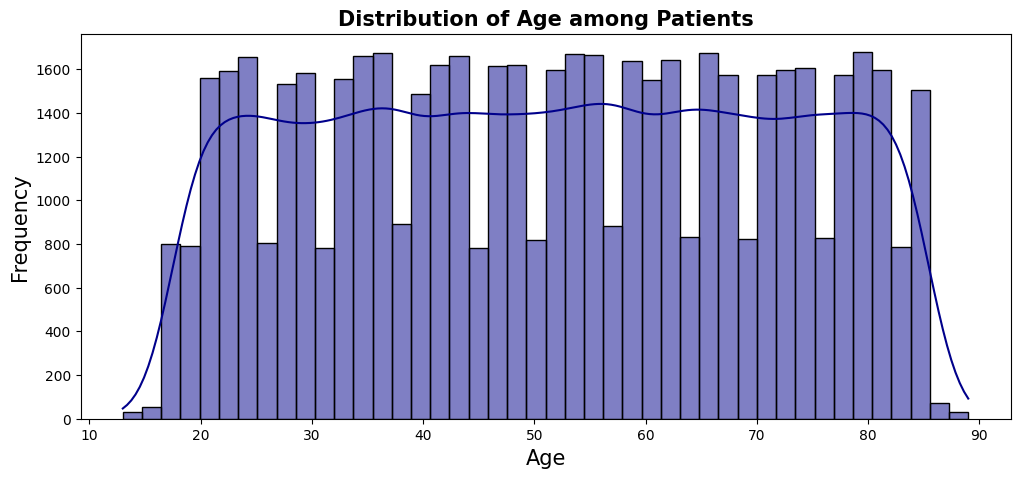

____________________________________________________________________________________________________


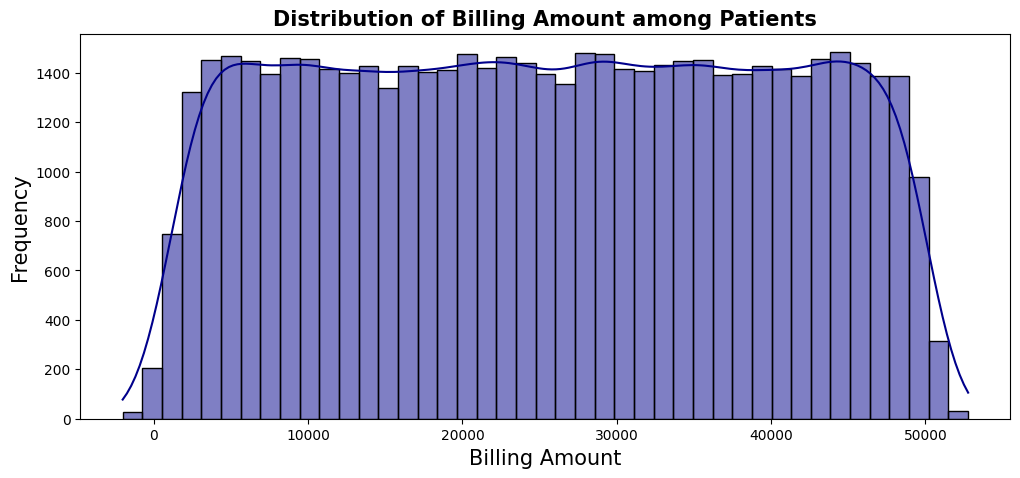

____________________________________________________________________________________________________


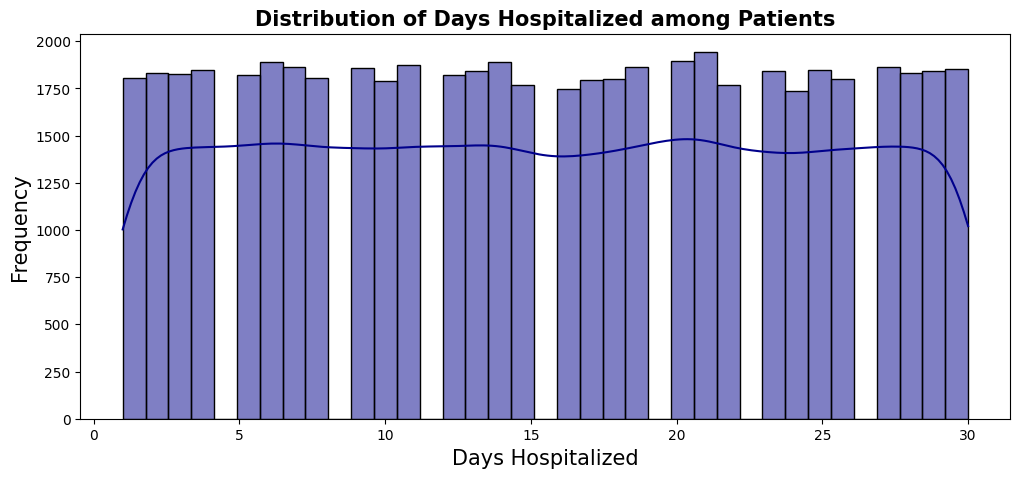

In [23]:

# Plot histograms for numeric columns
for col in healthcare.columns:
    if healthcare[col].dtype == 'int' or healthcare[col].dtype == 'float':
        plt.figure(figsize=(12, 5))
        plt.style.use('seaborn-v0_8-dark-palette')
        
        sns.histplot(healthcare[col], kde=True, color='darkblue')
        plt.ylabel('Frequency', fontsize=15)
        plt.xlabel(col, fontsize=15)
        plt.title(f'Distribution of {col} among Patients', fontsize=15, weight='bold')
        
        print("_" * 100)  # Just a separator in output
        plt.show()


# Code Explanation: Plotting Bar Charts & Pie Charts for Categorical Data

This code visualizes the distribution of categorical columns (except "Doctor" and "Hospital") using both bar charts and pie charts. Let's break it down step by step:

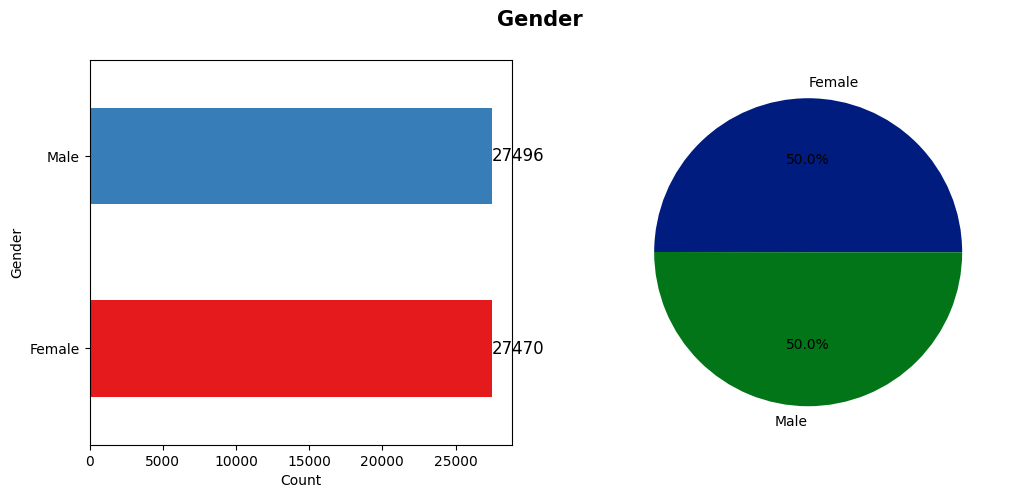

____________________________________________________________________________________________________




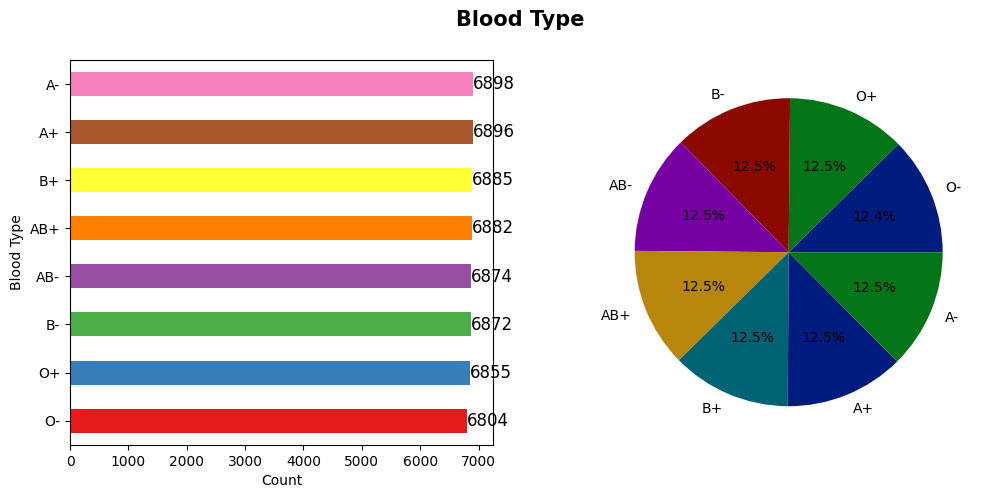

____________________________________________________________________________________________________




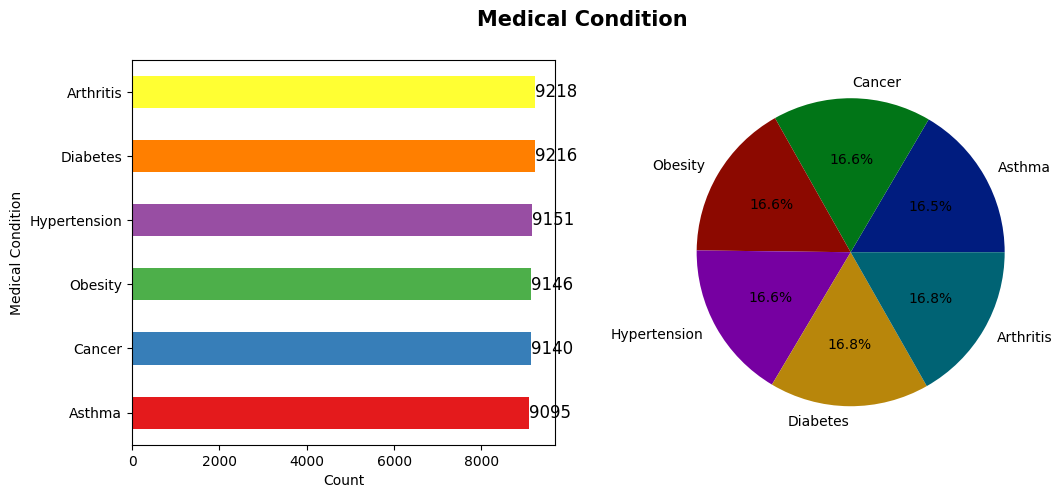

____________________________________________________________________________________________________




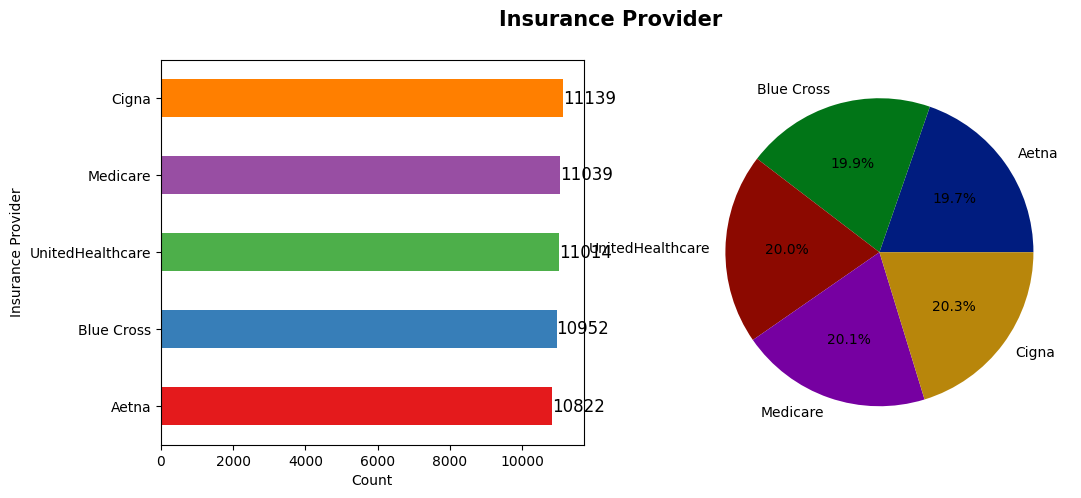

____________________________________________________________________________________________________




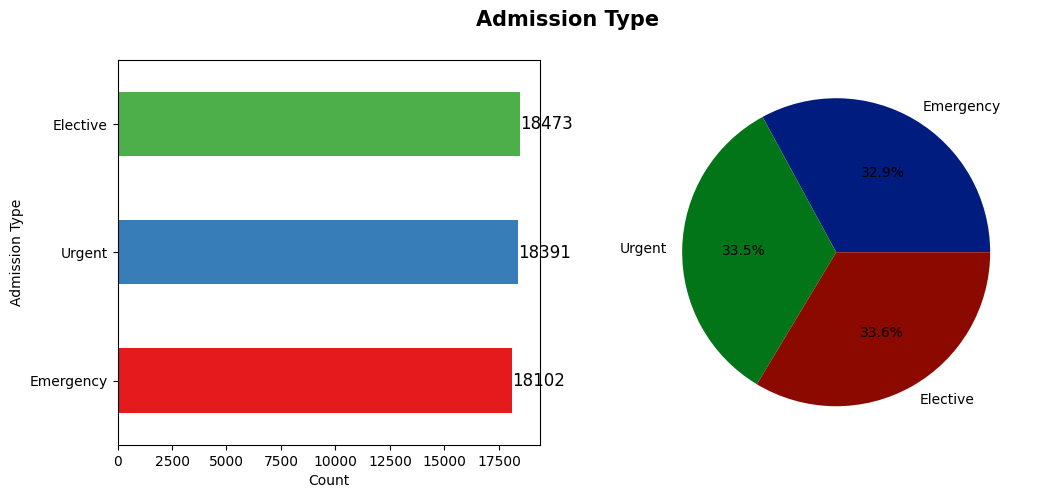

____________________________________________________________________________________________________




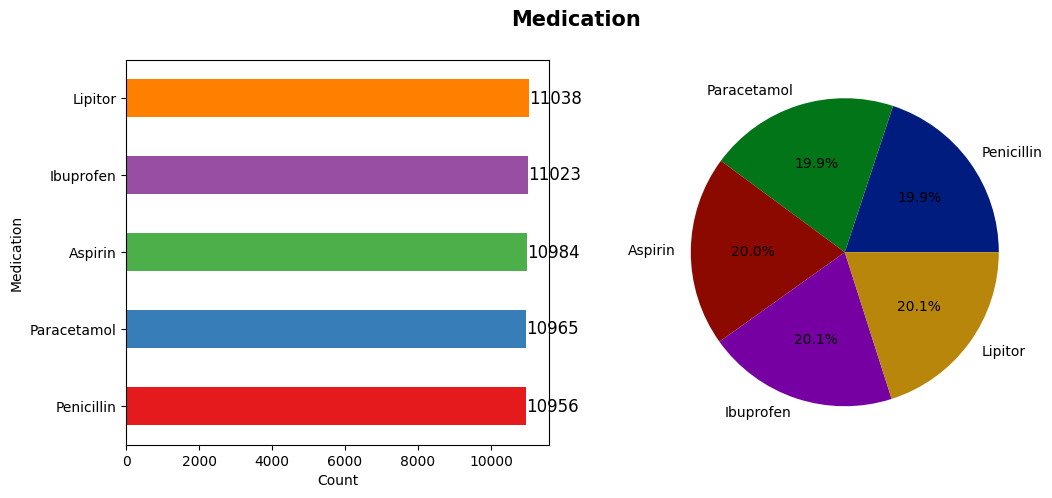

____________________________________________________________________________________________________




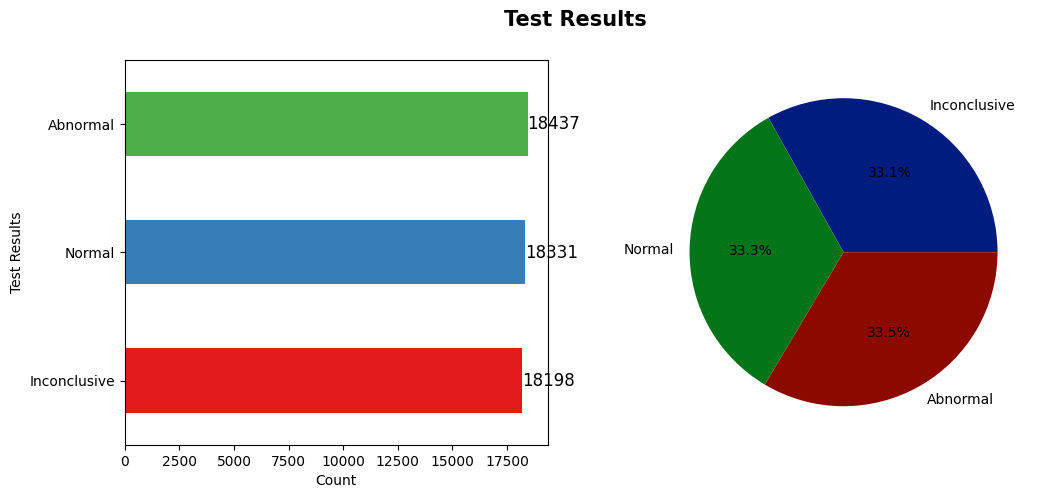

____________________________________________________________________________________________________


In [42]:

# Loop through all columns in the dataset
for col in healthcare.columns:
    # Check if the column is categorical (dtype = 'O') and exclude 'Doctor' and 'Hospital'
    if healthcare[col].dtype == 'O' and col != 'Doctor' and col!= 'Hospital':
        
        print("\n")  # Print a newline for better readability

        # Create a figure with two subplots (1 row, 2 columns)
        fig, ax = plt.subplots(1, 2, figsize=(12, 5))
        fig.suptitle(col, fontsize=15, weight='bold')  # Set the title of the figure

        # Bar Chart (Left)
        plt.subplot(1, 2, 1)
        category_count = healthcare[col].value_counts().sort_values()  # Count unique values and sort them
        category_count.plot(kind='barh', color=plt.cm.Set1.colors)  # Create a horizontal bar chart

        # Add value labels to the bars
        for index, value in enumerate(category_count):
            plt.text(value, index, str(value), fontsize=12, va='center')

        plt.xlabel('Count')  # Set x-axis label

        # Pie Chart (Right)
        plt.subplot(1, 2, 2)


        category_count.plot(kind='pie',
                            labels=category_count.index, 
                            autopct='%1.1f%%',  # Show percentage
                            textprops={'fontsize': 10})  # Set font size for better readability

        plt.ylabel('')  # Remove default y-axis label
        
        # Show the plots
        plt.show()
        print("_" * 100)  # Print separator line for clarity


In [25]:
healthcare.columns

Index(['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Doctor',
       'Hospital', 'Insurance Provider', 'Billing Amount', 'Admission Type',
       'Medication', 'Test Results', 'Days Hospitalized'],
      dtype='object')

# What is the distribution of medical condtions between genders?

In [48]:
gender_wise_medical=healthcare.groupby(['Medical Condition','Gender']).size().sort_values().unstack()
gender_wise_medical


Gender,Female,Male
Medical Condition,,
Arthritis,4642,4576
Asthma,4511,4584
Cancer,4566,4574
Diabetes,4609,4607
Hypertension,4569,4582
Obesity,4573,4573


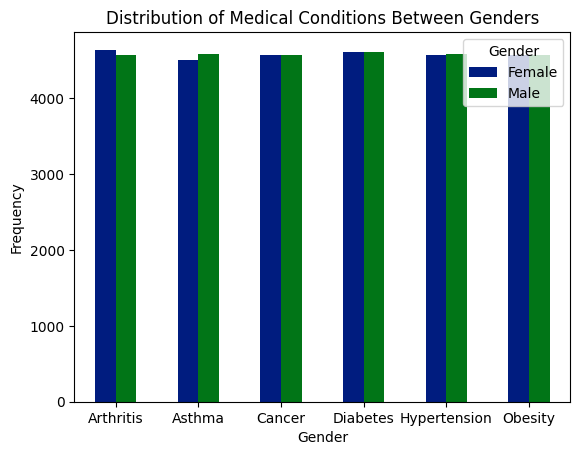

In [50]:
gender_wise_medical.plot(kind = 'bar')
plt.title('Distribution of Medical Conditions Between Genders')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.show()

# Interpretation

Female have higher share in majority of the medical conditions. Cancer is leading medical condition among female whereas Hypertension is leading cause among male.

# What is the correlation between age,billing amount and days hospitalized

In [52]:
# Selecting the columns to correlate
correlation_columns = ['Age', 'Billing Amount', 'Days Hospitalized']

# Creating a df using the above columns (explicit copy to avoid warning)
correlate_df = healthcare[correlation_columns].copy()

# Encoding categorical columns safely using .loc
correlate_df.loc[:, 'Gender'] = healthcare['Gender'].astype('category').cat.codes
correlate_df.loc[:, 'Admission Type'] = healthcare['Admission Type'].astype('category').cat.codes
correlate_df.loc[:, 'Test Results'] = healthcare['Test Results'].astype('category').cat.codes

# Creating correlation matrix
correlation_matrix = correlate_df.corr()
correlation_matrix


,Age,Billing Amount,Days Hospitalized,Gender,Admission Type,Test Results
Age,1.000000,-0.003427,0.007890,-0.002510,0.004098,-0.006974
Billing Amount,-0.003427,1.000000,-0.004891,0.004939,-0.002815,-0.002635
Days Hospitalized,0.007890,-0.004891,1.000000,0.004224,-0.005066,0.001289
Gender,-0.002510,0.004939,0.004224,1.000000,0.009642,0.005073
Admission Type,0.004098,-0.002815,-0.005066,0.009642,1.000000,-0.000602
Test Results,-0.006974,-0.002635,0.001289,0.005073,-0.000602,1.000000


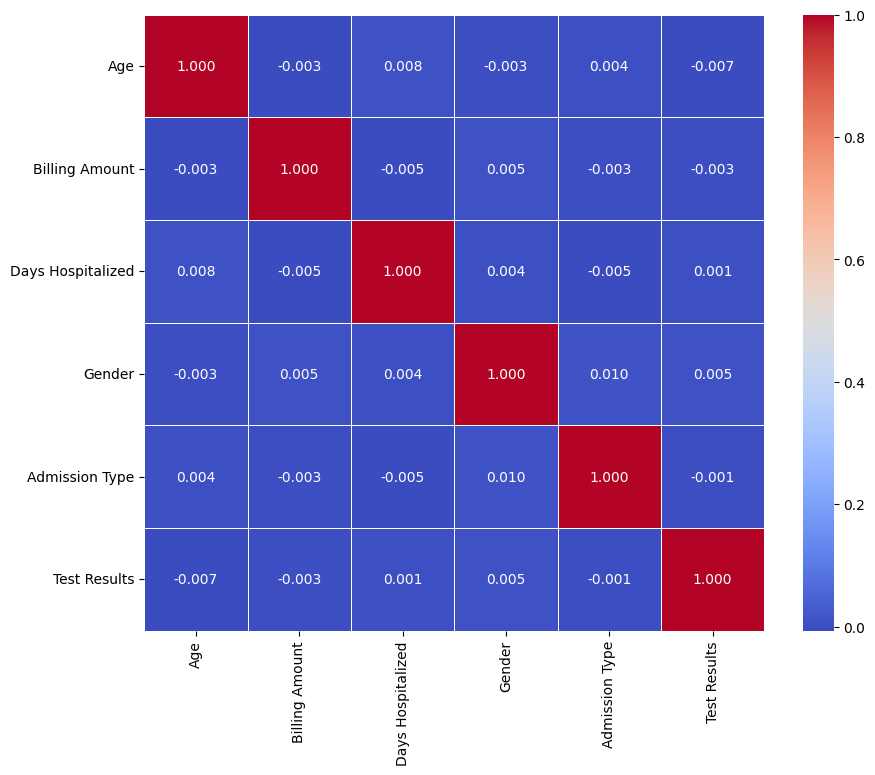

In [53]:
#plotting correlation matrix using heatmap
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix,annot = True,cmap = 'coolwarm',fmt = '.3f',linewidths = 0.5)
plt.show()

# Interpretation

1) There is a slight correlation between age and test results. Even there is a positive correlation between age and days hospitalized. There is a           negative correlation between age and billing amount.
2) Biling amount has negative correlation with test results and days hospitalized.Billing amount has a positive correlation with admission type and         gender.
3) Days hospitalized has negative correlation with every attribute except age.
4) Except for billing amount attribute, gender has a negative correlation with all other attributes.
   Admission type and test results have a negative correlation.

# What is the total billAing amount for top 10 hospitals?

In [55]:
# Grouping data by hospital and calculating the average billing amount
top10_hospital_billing = healthcare.groupby(['Hospital'])['Billing Amount'].sum().sort_values(ascending = False)[:10].reset_index()
top10_hospital_billing

,Hospital,Billing Amount
0,Johnson PLC,1.081477e+06
1,LLC Smith,1.030190e+06
2,Smith PLC,1.029424e+06
3,Ltd Smith,1.003366e+06
4,Smith Ltd,9.700359e+05
5,Johnson Inc,9.343107e+05
6,Group Smith,9.029758e+05
7,Inc Brown,8.779613e+05
8,LLC Johnson,8.164384e+05
9,Smith Group,8.066313e+05


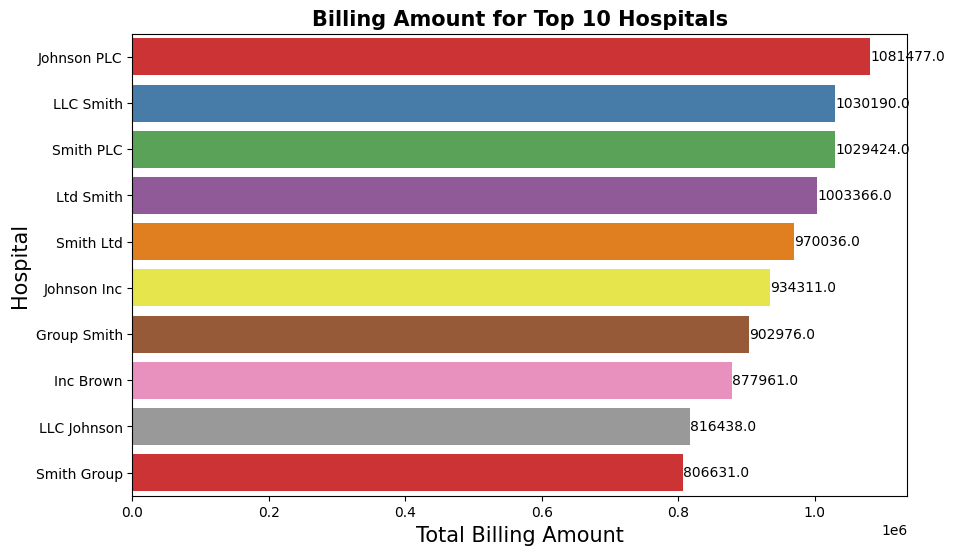

In [59]:
plt.figure(figsize=(10, 6))

# Plot bar graph to find the top 10 hospitals by billing
sns.barplot(
    x=top10_hospital_billing['Billing Amount'],
    y=top10_hospital_billing['Hospital'],
    hue=top10_hospital_billing['Hospital'],  # Assign hue to avoid warning
    dodge=False,  # Prevents bars from being split into different colors
    palette="Set1",
    legend=False  # Remove unnecessary legend
)

# Adding data labels on bars
for index, value in enumerate(top10_hospital_billing['Billing Amount']):
    plt.text(value, index, str(round(value, 0)), fontsize=10, va='center')

# Adding labels and title
plt.xlabel('Total Billing Amount', fontsize=15)
plt.ylabel('Hospital', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Billing Amount for Top 10 Hospitals', fontsize=15, weight='bold')

# Display the plot
plt.show()

INTERPRETATION

johnson PLC has the highest average billing amount of 477639.

# Who are the top 20 doctors by billing amount?

In [61]:
# Grouping data by doctors and calculating the sum of billing amount
top20_doctors_billing = healthcare.groupby(['Doctor'])['Billing Amount'].sum().sort_values(ascending = False)[:20].reset_index()
top20_doctors_billing

,Doctor,Billing Amount
0,Michael Smith,784501.843132
1,John Smith,610109.604175
2,Robert Smith,609160.688766
3,Robert Johnson,524193.003178
4,David Smith,473345.609187
5,William Johnson,469198.116030
6,John Johnson,466769.966463
7,James Smith,461817.900317
8,Michael Johnson,460819.038528
9,David Johnson,445605.542275


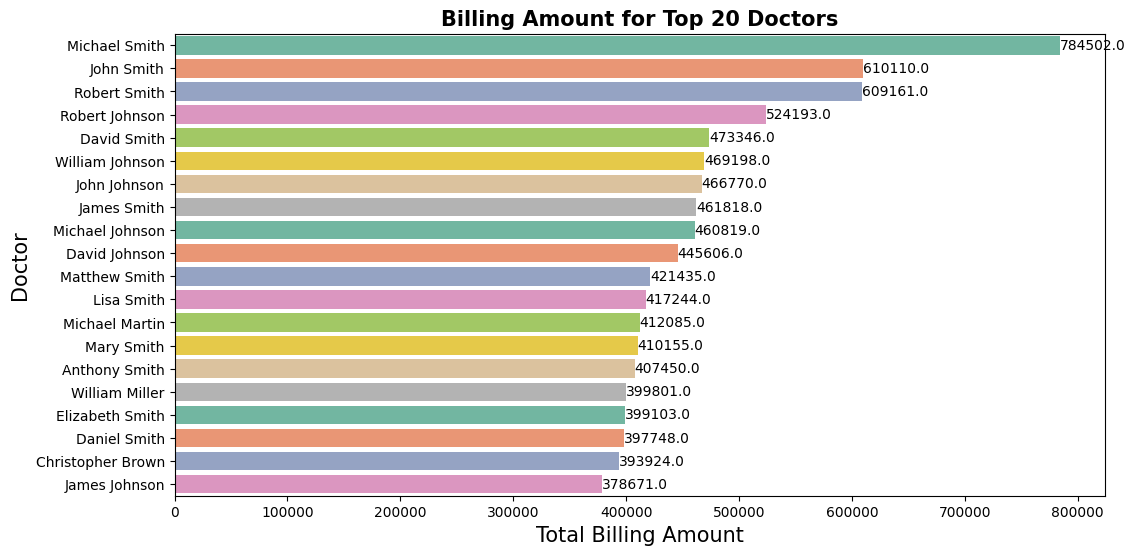

In [63]:
# Plot bar graph to find the top 20 doctors by billing
plt.figure(figsize=(12,6))

# Create bar plot
sns.barplot(
    x=top20_doctors_billing['Billing Amount'],
    y=top20_doctors_billing['Doctor'],
    hue=top20_doctors_billing['Doctor'],  # Assign hue to avoid warning
    dodge=False,  # Ensures bars are not split into different colors
    palette="Set2",
    legend=False  # Remove unnecessary legend
)

# Adding data labels
for index, value in enumerate(top20_doctors_billing['Billing Amount']):
    plt.text(value, index, str(round(value, 0)), fontsize=10, va='center')

# Adding labels and title
plt.xlabel('Total Billing Amount', fontsize=15)
plt.ylabel('Doctor', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Billing Amount for Top 20 Doctors', fontsize=15, weight='bold')

# Show the plot
plt.show()


# Interpretation

Doctor Michael Johnson is the top doctor with a total billing amount of 784502

# Which medical condition generated the highest average billing among male and female?

In [64]:
# Grouping data by medical condition and gender then calculating the mean of billing amount
medical_gender_billing = healthcare.groupby(['Medical Condition','Gender'])[['Billing Amount']].mean().reset_index()
medical_gender_billing

,Medical Condition,Gender,Billing Amount
0,Arthritis,Female,25337.234722
1,Arthritis,Male,25688.849297
2,Asthma,Female,25358.633474
3,Asthma,Male,25903.913291
4,Cancer,Female,25284.314393
5,Cancer,Male,25020.562355
6,Diabetes,Female,25558.060586
7,Diabetes,Male,25762.941146
8,Hypertension,Female,25434.788625
9,Hypertension,Male,25571.135120


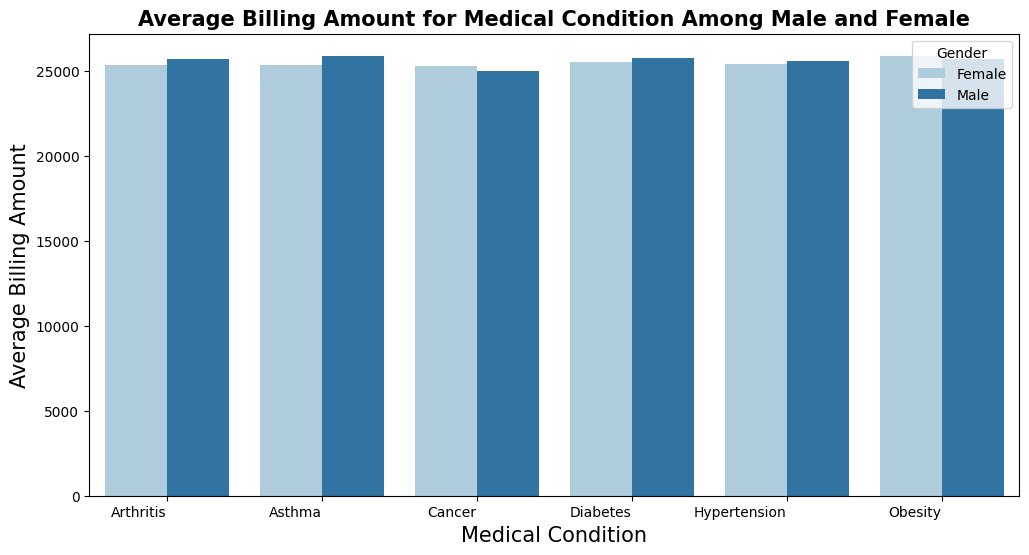

In [67]:

# Plot bar graph to find the average billing amount for medical condition among male and female
plt.figure(figsize=(12,6))

sns.barplot(
    x=medical_gender_billing['Medical Condition'],
    y=medical_gender_billing['Billing Amount'],
    hue=medical_gender_billing['Gender'],
    errorbar=None,  # Replacing deprecated 'ci' with 'errorbar=None'
    palette="Paired"  # Changing color palette
)

# Rotate x-axis labels for better visibility
plt.xticks( ha='right')

# Adding labels and title
plt.ylabel('Average Billing Amount', fontsize=15)
plt.xlabel('Medical Condition', fontsize=15)
plt.title('Average Billing Amount for Medical Condition Among Male and Female', fontsize=15, weight='bold')

# Display the plot
plt.show()

# What is the distribution of different age groups?

In [71]:
min_age = healthcare['Age'].min()
max_age = healthcare['Age'].max()
print('minium age is:', min_age , "," , 'maximum age is:' , max_age)


minium age is: 13 , maximum age is: 89


In [73]:
healthcare['Age_Group'] = pd.cut(healthcare['Age'],bins = [18,30,40,50,60,70,80,float('inf')],
                                labels = ['18-30','31-40','41-50','51-60','61-70','71-80','Over 80'],
                                right = True)
Age_group = healthcare['Age_Group'].value_counts().sort_values(ascending = False)
Age_group

Age_Group
18-30      9519
51-60      8222
61-70      8145
41-50      8116
31-40      8051
71-80      8032
Over 80    3995
Name: count, dtype: int64

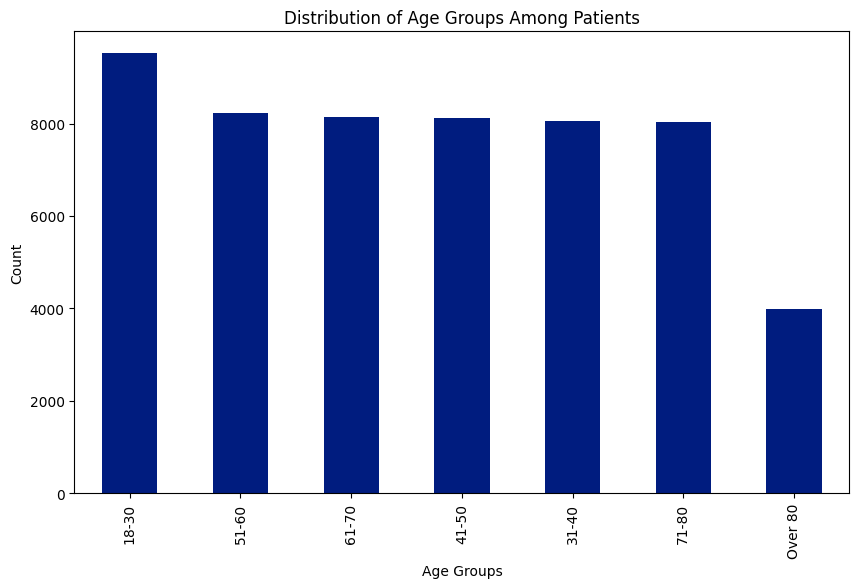

In [76]:
plt.figure(figsize=(10,6))
Age_group.plot(kind = 'bar')
plt.title('Distribution of Age Groups Among Patients')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.show()

# Interpretation

The maximum number of patients are in the range of 18-30.

# CONCLUSION

1) Compared to male, there are high female patients.
2) Most patients have the blood type of A-.
3) Arthritis is the major medical condition among patients.
4) Cigna is the leading insurance provider.
5) Lipitor is the most prescribed medication.